In [1]:
from matplotlib import pyplot as plt

from src.renkine import StandartRenkine, WithAddIsobaricRenkine, WithoutSteamOverheatingRenkine
from src.loader import SaturationLoader

In [2]:
saturation_loader = SaturationLoader()
T_saturation, S_saturation, H_saturation = saturation_loader.get_data()

In [ ]:
"""
# Данные для 5 точки цикла Ренкина
>>> S_5_point = 1.357113
>>> H_5_point = 286.405
>>> P_6_point = 1.5 # если идет расчет для цикла с дополнительной изобарой

>>> renkine = StandartRenkine(S_5_point, H_5_point)
>>> renkine = WithoutSteamOverheatingRenkine(S_5_point, H_5_point)
>>> renkine = WithAddIsobaricRenkine(S_5_point, H_5_point, P_6_point)
"""

In [3]:
# Данные для 5 точки цикла Ренкина
S_5_point = 1.357113
H_5_point = 286.405
P_6_point = 1.5

In [4]:
renkine = WithoutSteamOverheatingRenkine(S_5_point, H_5_point)

In [5]:
(
    S_RENKINE, T_RENKINE, S, T
) = renkine.renkine_data()

Расчет точки 5...
Точка 5 расчитана
Расчет точки 4...
Точка 4 расчитана
Расчет точки 6...
Точка 6 расчитана
Расчет точки 3...
Точка 3 расчитана
Расчет точки 1...
Точка 1 расчитана
Расчет точки 2...
Точка 2 расчитана
Сохранение данных цикла Ренкина...
Данные успешно сохранены


,Точка,v (м^3/кг),P (бар),T (°C),H (кДж/кг),S (кДж/кг·K),Техническое устройство
0,1,0.000632,1.5,-30.000000,169.426770,0.882310,После конденсатора перед поступлением в насос
1,2,0.000630,10.0,-29.303829,169.970511,0.882310,После насоса перед котлом
2,3,0.000775,10.0,30.000000,234.206905,1.117175,В котле
3,4,0.009986,10.0,30.000000,307.375683,1.357113,После котла
4,5,0.073565,1.5,-10.000000,286.405000,1.357113,После турбины
5,6,0.067319,1.5,-30.000000,273.007397,1.304530,После турбины


In [6]:
renkine.renkine_params()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Параметр,Значение
0,Работа насоса кДж/кг,0.543742
1,Работа турбины кДж/кг,20.970683
2,КПД Ренкина,0.148662
3,КПД Карно,0.197922


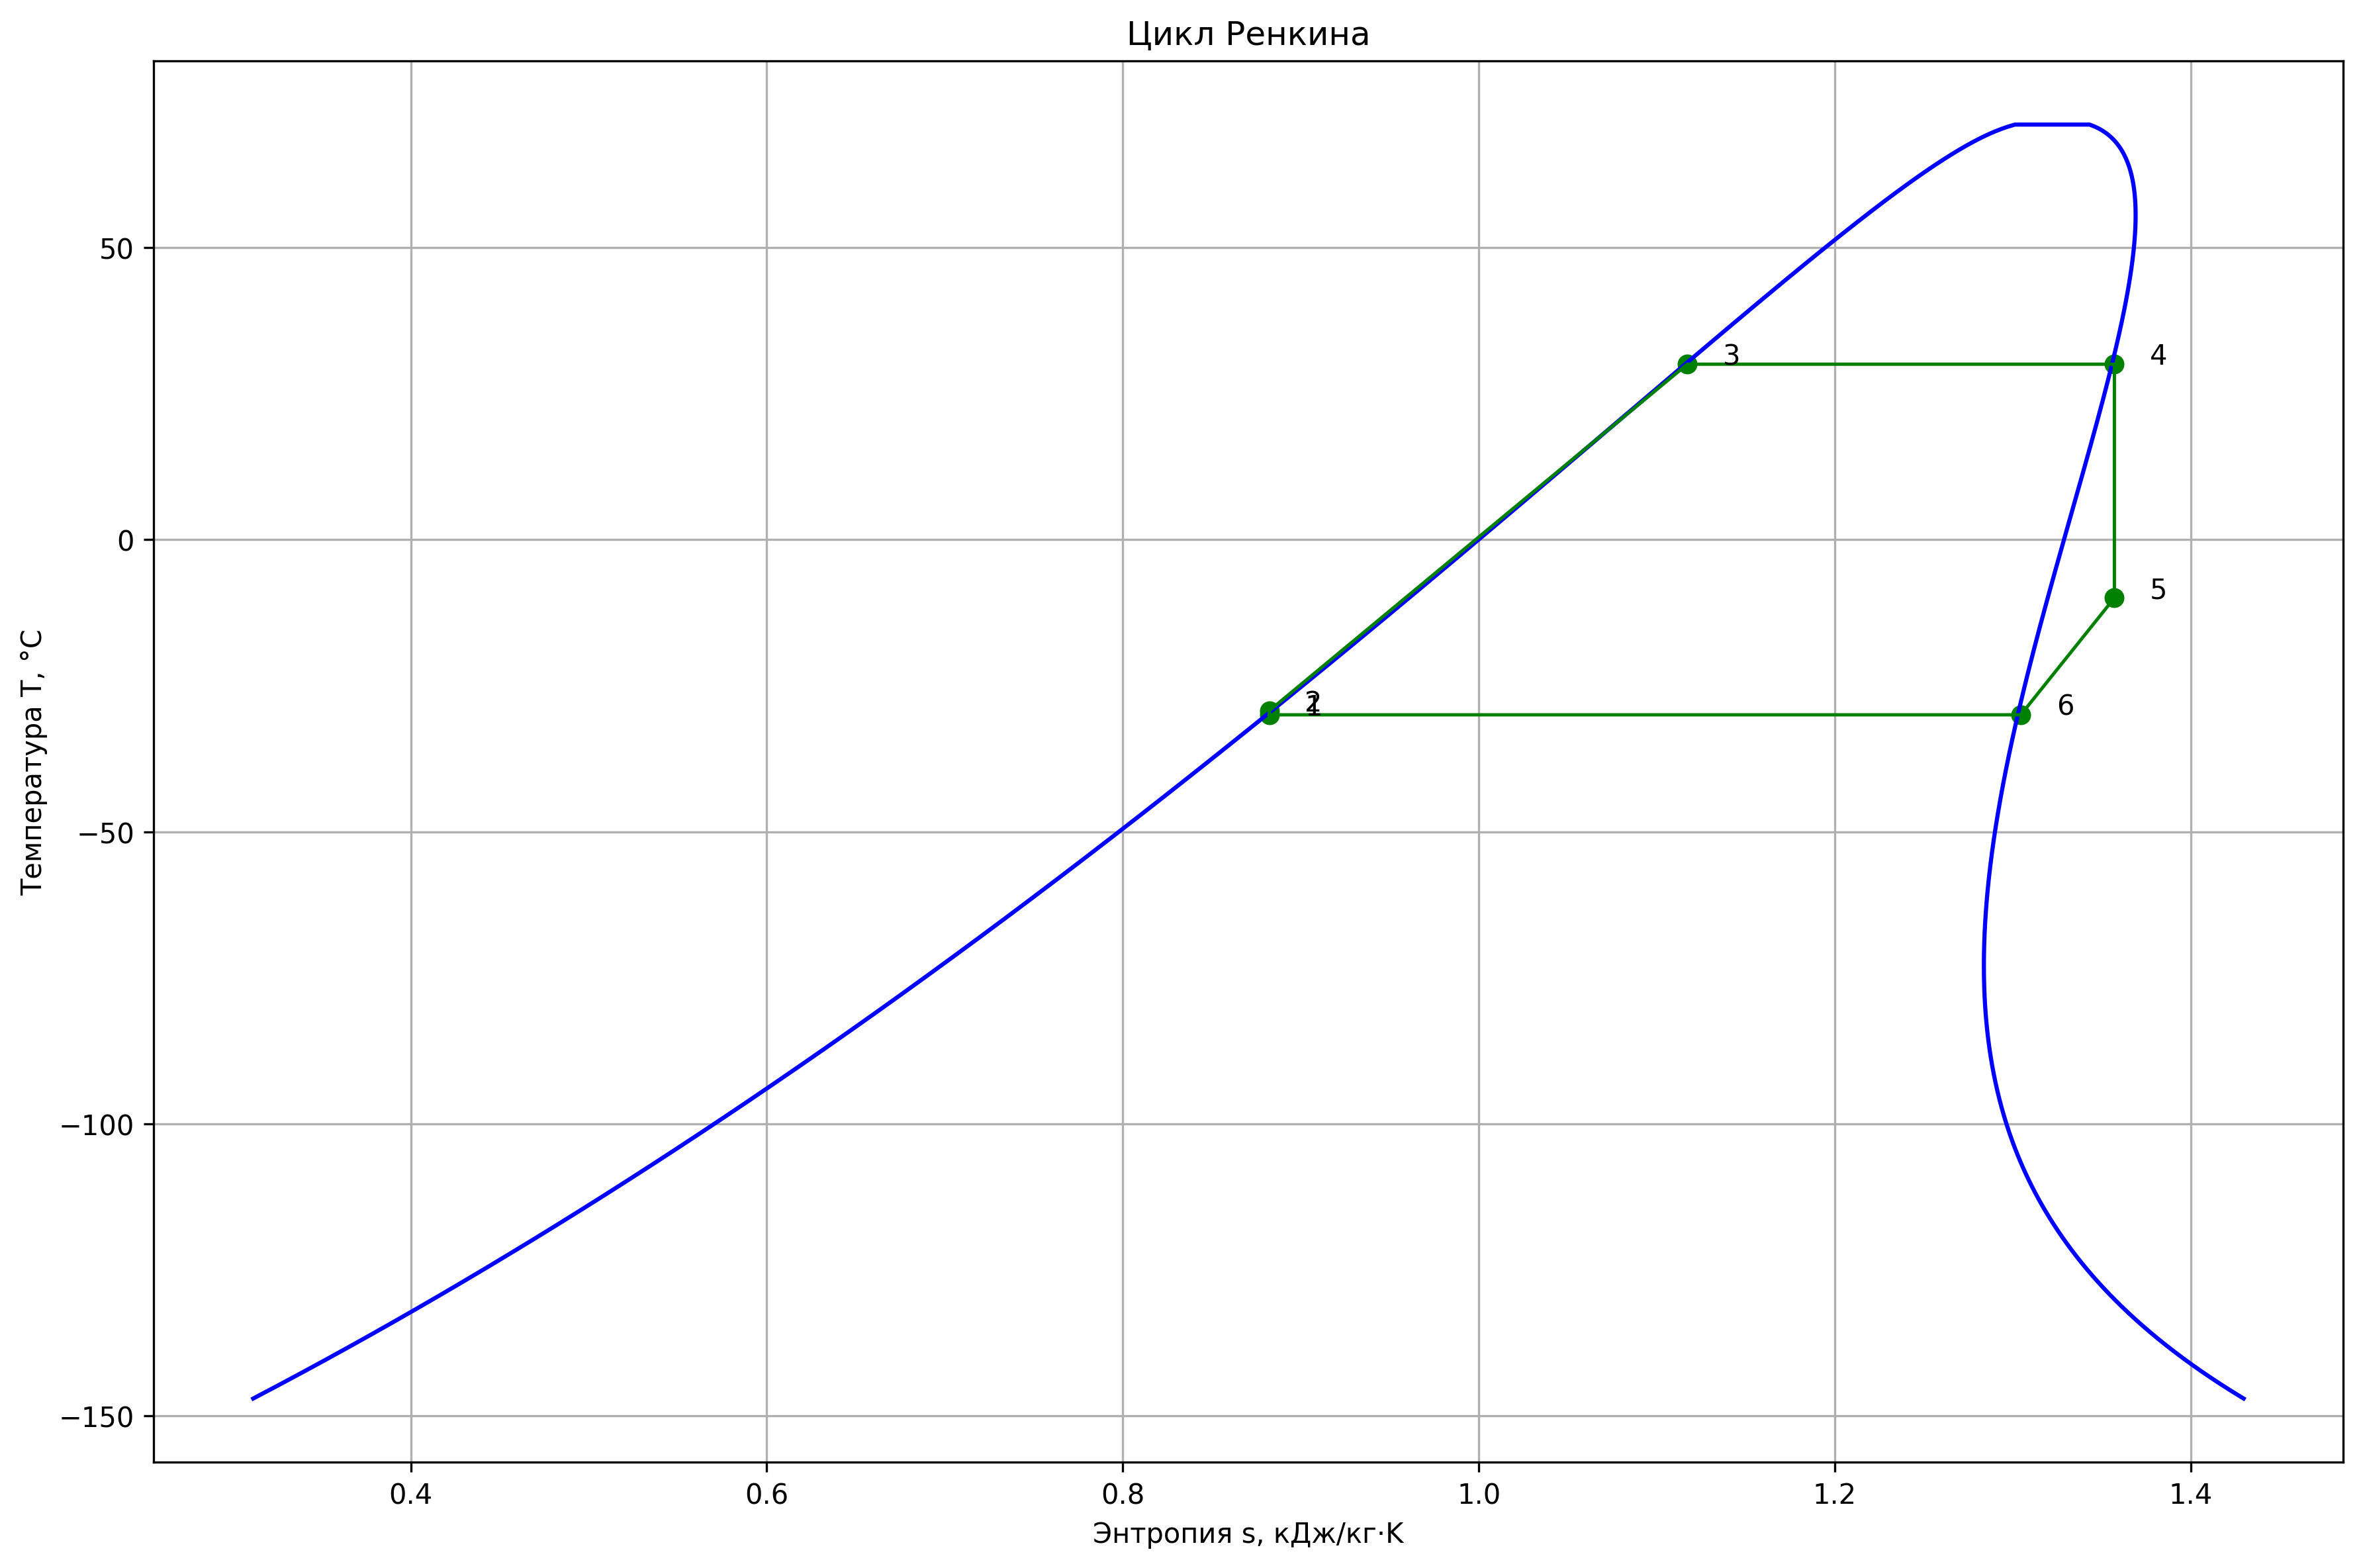

In [7]:
delta = 0.02
plt.figure(figsize=(12, 8), dpi=300)

# Линия насыщения
plt.plot(S_saturation, T_saturation, color='blue')

plt.plot(S, T, color='g', linewidth=1.2)
plt.scatter(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
for i in range(len(S_RENKINE)):
    plt.text(
            S_RENKINE[i] + delta, 
            T_RENKINE[i] + delta, 
            f"{i + 1}", 
            fontsize=10, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )
plt.xlabel("Энтропия s, кДж/кг·K")
plt.ylabel("Температура T, °C")
plt.title("Цикл Ренкина")
plt.grid(True)
plt.tight_layout()
plt.show()